## **Build Your Own Face Filter With OpenCV**

Face filters are common applications that we use almost every day in our lives. From Snapchat to Instagram there are thousands of filters that allow you to look like an animal, a princess or even another human being. As fun as it is to use these filters, it is also simple to build your own custom face filter. Using basic and efficient OpenCV techniques we will build a custom face filter that replaces your nose with a dog nose. 

In this practice session, we will learn about the implementation of face filters using a 68 point landmark detector and OpenCV. 

## **Understanding the landmark stabilizer**

For this implementation, we will make use of the 68 point landmark stabilizer. Download the stabilizer using this link. The landmark stabilizer is a file from the dlib package that makes it easy to identify 68 points on the human face. These landmarks are a key factor in building the face filter. 
dlib

These points can help in locating the coordinate points of the nose, eyes and lips. Using these points it is possible to place the filter exactly on the location needed. So let us get started with the implementation. 



In [ ]:

!python -m pip install pip --upgrade --user -q --no-warn-script-location
!python -m pip install numpy pandas seaborn matplotlib scipy statsmodels sklearn nltk opencv-python tensorflow keras torch torchvision \
    tqdm scikit-image pixellib pytube dlib --user -q --no-warn-script-location

import IPython
IPython.Application.instance().kernel.do_shutdown(True)


In [2]:
# !wget -nd https://github.com/JeffTrain/selfie/raw/master/shape_predictor_68_face_landmarks.dat

--2021-06-01 04:36:17--  https://github.com/JeffTrain/selfie/raw/master/shape_predictor_68_face_landmarks.dat
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JeffTrain/selfie/master/shape_predictor_68_face_landmarks.dat [following]
--2021-06-01 04:36:17--  https://raw.githubusercontent.com/JeffTrain/selfie/master/shape_predictor_68_face_landmarks.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99693937 (95M) [application/octet-stream]
Saving to: ‘shape_predictor_68_face_landmarks.dat’

shape_predictor_68_ 100%[===================>]  95.08M   136MB/s    in 0.7s    

2021-06-01 04:36:19 (136 M

If you don’t already have dlib installed you can install this package using 


In [1]:
!python -m pip install dlib  --user -q

Once you have downloaded the landmark stabilizer and installed dlib, we can start with the implementation. Select the filter you want to apply for your face. I have selected the animated image of a dog’s nose. If you would like to use the same image you can download it [here](http://clipart-library.com/clip-art/dog-filter-transparent-background-18.htm).

This is the image of the filter I have chosen.

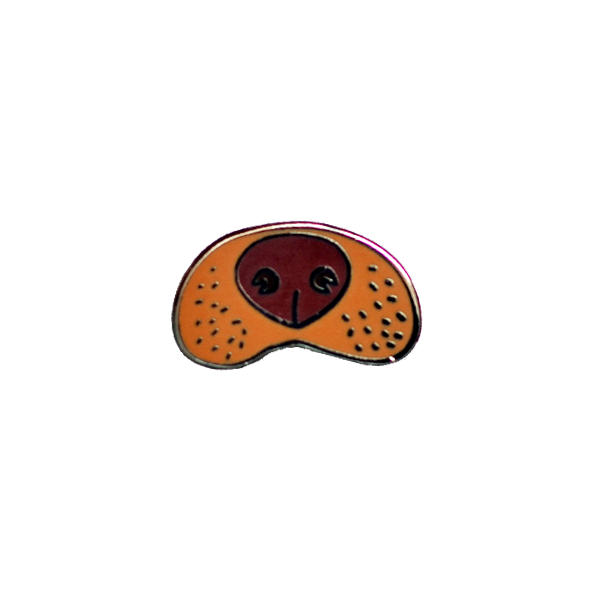

In [1]:
!wget http://clipart-library.com/images_k/dog-filter-transparent-background/dog-filter-transparent-background-18.png

--2021-10-29 12:34:38--  http://clipart-library.com/images_k/dog-filter-transparent-background/dog-filter-transparent-background-18.png
Resolving clipart-library.com (clipart-library.com)... 148.251.41.80
Connecting to clipart-library.com (clipart-library.com)|148.251.41.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73871 (72K) [image/png]
Saving to: ‘dog-filter-transparent-background-18.png’

dog-filter-transpar 100%[===================>]  72.14K   182KB/s    in 0.4s    

2021-10-29 12:34:39 (182 KB/s) - ‘dog-filter-transparent-background-18.png’ saved [73871/73871]



## **Importing the libraries**

In [4]:
import cv2
import numpy as np
import dlib
import math

## **Implementation of Face Filter**

Once we have the libraries we need, we can load the image and the 68 point landmark stabilizer. 

In [5]:
landmark_detector = dlib.get_frontal_face_detector()
landmark_predictor = dlib.shape_predictor("https://gitlab.com/AnalyticsIndiaMagazine/practicedatasets/-/raw/main/face_swapping/shape_predictor_68_face_landmarks.dat")
dog_image = cv2.imread("dog-filter-transparent-background-18.png")

The next step is to start building the frames by switching the video camera on to capture the user’s face. Once we have these frames we can use the 68 points as a reference to fit the nose on the human nose. 

In [6]:
vid_capture=cv2.VideoCapture(0)
vid, frame = vid_capture.read()
rows, cols, _vid= frame.shape
dog_mask = np.zeros((rows, cols))

AttributeError: ignored

Here, we create a mask containing a matrix of zeros with the dimensions equal to the rows and columns of the frame size. Once the points are detected this mask is updated. 

Now that we have the frames and the filter we can overlay them on each other. 

Our intention is to overlay the dog nose on the human one. Hence we will use the leftmost and rightmost points as well the topmost and the centre of the nose. 

In [7]:
nosetop = (landmarks.part(27).x, landmarks.part(27).y)
nosemid = (landmarks.part(30).x, landmarks.part(30).y)
noseleft = (landmarks.part(31).x, landmarks.part(31).y)
noseright = (landmarks.part(35).x, landmarks.part(35).y)

NameError: ignored

 But this needs to happen for every frame as long as the video is playing. So, we add it inside a while loop to make sure the filter is seen at each frame. 

In [ ]:
while True:
    vid, frame = vid_capture.read()
    dog_mask.fill(0)
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = landmark_detector(frame)
    for face in faces:
        landmarks = predictor(gray_frame, face)
        nosetop = (landmarks.part(29).x, landmarks.part(29).y)
        nosemid = (landmarks.part(30).x, landmarks.part(30).y)
        noseleft = (landmarks.part(31).x, landmarks.part(31).y)
        noseright = (landmarks.part(35).x, landmarks.part(35).y)

But this needs to happen for every frame as long as the video is playing. So, we add it inside a while loop to make sure the filter is seen at each frame. 

Next, we need to make sure that the filter moves along with the face and also fills the nose dimensions to cover the nose. To do this, we will adjust the height and width of the dog nose as follows. 

In [ ]:
dog_width = int(math.hypot(noseleft[0] - noseright[0], noseleft[1] - noseright[1]))
dog_height = int((nosetop-nosemid*(dog_image.size))

Doing this will adjust the height and width of the nose as the user moves towards and away from the camera. 

But a new problem arises with this. The filter becomes unstable when the user moves the head up and down because the filter is not yet centred. To centre the image we can use the following step:

In [ ]:
up_center = (int(nosemid[0] - dog_width / 2),int(nosemid[1] - dog_height / 2))
down_center = (int(nosemid[0] + dog_width / 2),int(nosemid[1] + dog_height / 2))
dog_area = frame[up_center[1]: up_center[1] + dog_height,up_center[0]: up_center[0] + dog_width]

So now that we have found the midpoint and aligned the filter with the image through the mask, it is time to resize the filter and convert from grayscale to color. 

In [ ]:
dog_img = cv2.resize(dog_image, (dog_width, dog_height))
dog_img_gray = cv2.cvtColor(dog_img, cv2.COLOR_BGR2GRAY)

Next, we need to add this resized image to the final frame before displaying the video. 

In [ ]:
final_frame= cv2.add(mask, dog_img)
frame[up_center[1]: up_center[1] + dog_height,up_center[0]: up_center[0] + dog_width] = final_dog

## **Output**

Now, it is time to display the frames so that the filter gets added to our face. 

In [ ]:
cv2.imshow("final dog", final_dog)

As you can see above the filter has been successfully created and fit to the face. Its corresponding video is given below that shows that even in case of face movement, the filter does not get affected

#**Related Articles:**

> * [Build Face Filters](https://analyticsindiamag.com/how-to-build-your-own-face-filter-with-opencv/)

> * [Selfie Capture When you Smile](https://analyticsindiamag.com/selfie-capture-when-we-smile-my-fun-project-using-opencv/)

> * [Bitwise Operations On Images Using OpenCV](https://analyticsindiamag.com/how-to-implement-bitwise-operations-on-images-using-opencv/)

> * [Face Swaping with OpenCV](https://analyticsindiamag.com/a-fun-project-on-building-a-face-swapping-application-with-opencv/)

> * [Create Watermark Images with OpenCV](https://analyticsindiamag.com/how-to-create-a-watermark-on-images-using-opencv/)

> * [Convert Image to Cartoon](https://analyticsindiamag.com/converting-an-image-to-a-cartoon/)

> * [Sudoku Game with Deep Learning, OpenCV and Backtracking](https://analyticsindiamag.com/solve-sudoku-puzzle-using-deep-learning-opencv-and-backtracking/)

